In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import ast


In [2]:
dataframe = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', names = ['Wikipedia MovieID', 'Freebase MovieID', 'Movie name', 'Movie release date', 'Movie Boxoffice Revenue','Movie runtime', 'Movie Languages', 'Movie COuntries', 'Movie genres' ])

# Afficher le tableau
display(dataframe)

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [5]:
#Drop every movie with a NaN as a release date and create a new column Movie release year
dataframe2 = dataframe.copy(deep = True)
dataframe2 = dataframe2.dropna(subset=['Movie release date'])
dataframe2['Movie release Year'] = dataframe2['Movie release date'].str[0:4]
dataframe2['Movie release Year'] = pd.to_numeric(dataframe2['Movie release Year'], errors='raise') #Check si les strings sont autres que des nombres
dataframe2 = dataframe2.sort_values('Movie release Year', ascending=True) #Trier les films par ordre croissant des années

dataframe2.drop(62836, inplace=True) #Erreur sur la première valeur avec une année de 1010

df = dataframe2
# Remove the row which don't have the month of release:
df = df[df['Movie release date'].str.len() > 4]
df = df.reset_index()
display(df)

,index,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year
0,39307,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
1,14231,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
2,50565,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
3,67253,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894
4,15682,10094757,/m/02q1md8,Chinese Opium Den,1894-10-01,NaN,1.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894
...,...,...,...,...,...,...,...,...,...,...,...
42661,52234,35042288,/m/0j630fh,Bulbul,2014-07,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",{},2014
42662,34896,36534974,/m/0kdy118,Noah,2014-03-28,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01hmnh"": ""Fantasy""}",2014
42663,34454,35764246,/m/0jt01_6,Appayya,2014-08-15,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film""}",2014
42664,30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},{},2016


TEST 1: to get the list of all the genres, but the loop takes takes a long time!!

My pb: 
I have a column of my dataframe whose cell are of type json. I would like to merge all these lines in order to get a big json file, but don't know how to do that.


In [169]:
# Create an empty dataframe
empty_frame = {'genre ID': [], 'genre name': []}
genres = pd.DataFrame(data=empty_frame)


#Iterate over all rows: takes so much time!!!
for index, row in df.iterrows():
    #print(index)
    # Convert the JSON strings to Python dictionaries
    df2 = df.iloc[index]['Movie genres']
    df3 = json.loads(df2)
    df4 = pd.json_normalize(df3)

    # Transpose the DataFrame to move the first row of column names to become a regular row
    df5 = df4.T.reset_index()
    df5 = df5.rename(columns={'index': 'genre ID', 0: 'genre name'})

    #frames = [d, df5]
    # concatenate infos in rowq
    genres = pd.concat([genres, df5])

# delete all repeated values
genres = genres.drop_duplicates()
genres


,genre ID,genre name
0,/m/02hmvc,Short Film
1,/m/06ppq,Silent film
2,/m/0219x_,Indie
3,/m/01g6gs,Black-and-white
3,/m/0hcr,Animation
...,...,...
3,/m/03bt31n,Latino
3,/m/02crcx,Chick flick
0,/m/0jmw6g2,Buddy Picture
0,/m/0gfc_2y,Western


TEST 2: select only the first 2 genres, and add them to the main frame.


We start from the hypothesis that the genres are in importance order, so we'll keep only the first 2 genres per movie. 

PB: I think the order of genre is a bit random, so they can be very different from one to another, and so we could loose data by keeping 'Latino' instead of 'comic' for example.

In [240]:
# enlever un warning
pd.options.mode.chained_assignment = None  # default='warn'

# Create empty column for 2 main genres
df['genre 1']= None
df['genre 2'] = None

# Iterate over rows of df
for index, row in df.iterrows():

    df2 = df.iloc[index]['Movie genres']
    df3 = json.loads(df2)
    df4 = pd.json_normalize(df3)

    if df4.shape[1]>0:
        df['genre 1'].iloc[index] = df4.iloc[0, 0]

        if df4.shape[1]>1:
            df['genre 2'].iloc[index] = df4.iloc[0, 1]

df.head()

# Transpose the DataFrame to move the first row of column names to become a regular row
#df5 = df4.T.reset_index()
#df5 = df5.rename(columns={'index': 'genre ID', 0: 'genre name'})


,index,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year,genre 1,genre 2
0,57963,1082508,/m/044ggd,Roundhay Garden Scene,1888,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1888,Short Film,Silent film
1,38764,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",1889,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1889,Short Film,Silent film
2,53907,6431996,/m/0g53t3,"Monkeyshines, No. 1",1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film""}",1890,Silent film,None
3,60249,22770416,/m/0gj9h_4,London's Trafalgar Square,1890,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1890,Short Film,Silent film
4,17849,27773121,/m/0cc8h1v,Newark Athlete,1891,NaN,0.20,{},{},"{""/m/02hmvc"": ""Short Film""}",1891,Short Film,None


Idea: What would be interesting is to determine the most common genres, and to associate at each movie their two most famous genres, so we can make a more general analysis.

TEST 3: little test on the first movie

In [51]:
# enlever un warning
pd.options.mode.chained_assignment = None  # default='warn'

# Create an empty dataframe
empty_frame = pd.DataFrame(index=range(364),columns=range(2))
nb_genres = empty_frame.rename(columns={0: 'genre name', 1: 'nb of movies'})
nb_genres['nb of movies'].fillna(0,inplace=True)
i = 0

df2 = df.iloc[0]['Movie genres']
df3 = json.loads(df2)
df4 = pd.json_normalize(df3)


nb_genres['genre name'].iloc[0] = df4.iloc[0,0]
nb_genres['nb of movies'].iloc[0] = 1

for column in df4:
    print(not (nb_genres['genre name'].isin([df4[column].iloc[0]]).any()))
    if not (nb_genres['genre name'].isin([df4[column].iloc[0]]).any()):
        nb_genres['genre name'].iloc[i] = df4[column].iloc[0]
        nb_genres['nb of movies'][i] = 1
        i = i+1
    else:
        idx = nb_genres.loc[nb_genres['genre name'].isin([df4[column].iloc[0]])].index
        nb_genres['nb of movies'][idx] = nb_genres['nb of movies'][idx] + 1


nb_genres



False
True
True
True


,genre name,nb of movies
0,Short Film,2
1,Silent film,1
2,Indie,1
3,Black-and-white,1
4,NaN,0
...,...,...
359,NaN,0
360,NaN,0
361,NaN,0
362,NaN,0


TEST 4: all the genres and their occurrence. Takes 2min to compute!!!

In [49]:
# enlever un warning
pd.options.mode.chained_assignment = None  # default='warn'

# Create an empty dataframe
empty_frame = pd.DataFrame(index=range(363),columns=range(2))
nb_genres = empty_frame.rename(columns={0: 'genre name', 1: 'nb of movies'})
nb_genres['nb of movies'].fillna(0,inplace=True)
i = 0

df5 = None
# Iterate over rows of df
for index, row in df.iterrows():
    df2 = df.iloc[index]['Movie genres']
    df3 = json.loads(df2)
    df4 = pd.json_normalize(df3)
    
    for column in df4:
        if not (nb_genres['genre name'].isin([df4[column].iloc[0]]).any()):
            nb_genres['genre name'].iloc[i] = df4[column].iloc[0]
            nb_genres['nb of movies'][i] = 1
            i = i+1
        else:
            idx = nb_genres.loc[nb_genres['genre name'].isin([df4[column].iloc[0]])].index
            nb_genres['nb of movies'][idx] = nb_genres['nb of movies'][idx] + 1



In [50]:
nb_genres

,genre name,nb of movies
0,Short Film,4488
1,Silent film,3901
2,Indie,4349
3,Animation,2059
4,Black-and-white,5880
...,...,...
358,NaN,0
359,NaN,0
360,NaN,0
361,NaN,0


In [51]:
nb_genres = nb_genres.sort_values("nb of movies",ascending=False)
nb_genres = nb_genres.reset_index() #don't compute this over and over!!!!
nb_genres=nb_genres.dropna()

In [87]:
nb_genres.head(50)

,index,genre name,nb of movies
0,7,Drama,19036
1,8,Comedy,9990
2,21,Romance Film,6182
3,4,Black-and-white,5880
4,30,Thriller,5305
5,17,Action,5077
6,0,Short Film,4488
7,2,Indie,4349
8,19,Crime Fiction,4249
9,1,Silent film,3901


Relevant genres we need to gather:
- Drama
- Comedy/ Comedy film
- Romance film/ romantic drama, romantic comedy
- Action/ adventure 
- Thriller: crime fiction, crime thriller
- Horror 
- Family  animation 

Here we get the 50 most common genres. 
Ce qu'il reste à faire:
- identifier les groupes de genres, afin de pouvoir utiliser plus de data;
- associer dans le grand tableau les 2 principaux genres: trouver un moyen d'y acceder sans reparcourir toutes les lignes!! Impossible car jpp savoir quels genres sont les plus fréquents.


We can see that if we only select the 50 first genres, it is enough because below, they don't gather a lot of movies, so not that relevant. 

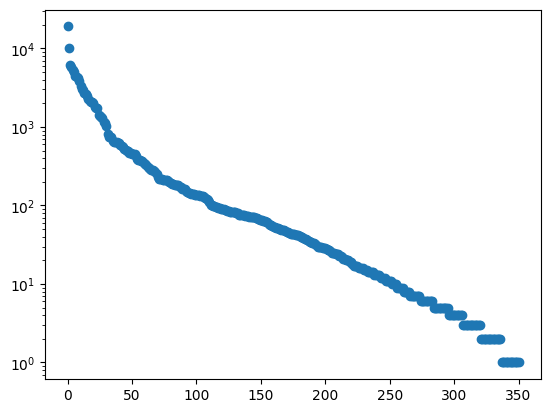

In [82]:
plt.scatter(nb_genres.index,nb_genres['nb of movies'])
plt.yscale("log")

In [65]:
drama_genres = nb_genres[nb_genres['genre name'].str.contains('Drama')]
drama_genres

,index,genre name,nb of movies
0,7,Drama,19036
37,69,Family Drama,641
60,67,Crime Drama,341
92,133,Courtroom Drama,155
106,128,Musical Drama,129
109,87,Marriage Drama,117
120,255,Erotic Drama,90
129,185,Childhood Drama,82
179,180,Addiction Drama,42
217,317,Inspirational Drama,20


In [89]:
comedy_genres = nb_genres[nb_genres['genre name'].str.contains('Comedy|Slapstick|Parody')]
comedy_genres

,index,genre name,nb of movies
1,8,Comedy,9990
15,11,Comedy film,2459
29,49,Comedy-drama,1121
42,59,Parody,578
48,29,Slapstick,469
80,44,Comedy of manners,192
87,51,Crime Comedy,173
90,25,Fantasy Comedy,163
91,110,Domestic Comedy,160
102,114,Comedy of Errors,135


In [64]:
romance_genres = nb_genres[nb_genres['genre name'].str.contains('Romance|Romantic')]
romance_genres

,index,genre name,nb of movies
2,21,Romance Film,6182
20,36,Romantic drama,1998
23,27,Romantic comedy,1765
161,105,Romantic fantasy,53
338,350,Romantic thriller,1


In [66]:
thriller_genres = nb_genres[nb_genres['genre name'].str.contains('Thriller|Crime')]
thriller_genres

,index,genre name,nb of movies
4,30,Thriller,5305
8,19,Crime Fiction,4249
26,61,Crime Thriller,1321
60,67,Crime Drama,341
62,52,Action Thrillers,307
87,51,Crime Comedy,173
156,156,Comedy Thriller,58
178,249,Law & Crime,42
188,177,Crime,34
306,293,Sci-Fi Thriller,4


In [86]:
action_genres = nb_genres[nb_genres['genre name'].str.contains('Action|Adventure|War')]
action_genres

,index,genre name,nb of movies
5,17,Action,5077
11,16,Adventure,3083
14,63,Action/Adventure,2627
24,13,War film,1412
62,52,Action Thrillers,307
82,48,Family-Oriented Adventure,186
93,97,Fantasy Adventure,149
112,60,Adventure Comedy,101
113,166,Action Comedy,99
135,54,Costume Adventure,75


In [76]:
family_genres = nb_genres[nb_genres['genre name'].str.contains('Family|Animation|Child')]
family_genres

,index,genre name,nb of movies
12,18,Family Film,2945
19,3,Animation,2059
37,69,Family Drama,641
38,46,Children's/Family,636
57,169,Children's,373
81,47,Children's Fantasy,189
82,48,Family-Oriented Adventure,186
89,302,Computer Animation,164
129,185,Childhood Drama,82
269,306,Children's Entertainment,7


In [77]:
# Drop movies which are not for Children
family_genres = family_genres.drop(family_genres.index[[2, 8, 10,11]])
family_genres

,index,genre name,nb of movies
12,18,Family Film,2945
19,3,Animation,2059
38,46,Children's/Family,636
57,169,Children's,373
81,47,Children's Fantasy,189
82,48,Family-Oriented Adventure,186
89,302,Computer Animation,164
269,306,Children's Entertainment,7


In [78]:
horror_genres = nb_genres[nb_genres['genre name'].str.contains('Horror')]
horror_genres

,index,genre name,nb of movies
13,9,Horror,2703
103,195,Horror Comedy,133
122,167,Sci-Fi Horror,88
185,92,Costume Horror,37
226,304,Road-Horror,16
326,276,Period Horror,2


In [85]:
informative_genres = nb_genres[nb_genres['genre name'].str.contains('Documentary|Biography|Biopic|History')]
informative_genres

,index,genre name,nb of movies
17,6,Documentary,2166
32,20,Biography,750
49,5,History,464
54,68,Biopic [feature],390
201,45,Film & Television History,28
273,275,World History,7


In [91]:
short_film_genre = nb_genres[nb_genres['genre name'].str.contains('Short Film')]
short_film_genre

,index,genre name,nb of movies
6,0,Short Film,4488


In [90]:
western_genres = nb_genres[nb_genres['genre name'].str.contains('Western')]
western_genres

,index,genre name,nb of movies
25,26,Western,1377
154,256,Spaghetti Western,61
173,82,B-Western,43
181,96,Comedy Western,40
182,227,Revisionist Western,40
215,153,Hybrid Western,21
229,214,Indian Western,16
244,102,Epic Western,12
330,282,Science fiction Western,2


Now that we have clusters of genres, we assign 2/3 main genre for each movies. The ones which do not have one main genre are not considered further in the analysis. 